In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))
import matplotlib.pyplot as plt
%matplotlib inline

# Any results you write to the current directory are saved as output.

['data.csv']


**To get a brief overview, this notebook is dedicated to 5 sections as follows**
1. Context of dataset
2. Data cleaning
3. EDA
4. Results
5. Conclusion

**Loading the dataset into pandas dataframe**

In [5]:
df=pd.read_csv('../input/data.csv',encoding='unicode_escape')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Column names of dataset**

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Check the number of rows and columns**

In [8]:
df.shape

(541909, 8)

In [9]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

****

**Before dealing with dataset first we need to understand the dataset.Let's try to understand what it is about to give us a better understanding of its context**

*The summarized information on the dataset is as follows:*
1. Most of the companies are country United Kingdom based
2. Transcational Period - 1st Dec 2010–9th Dec 2011 (One year)

**Data cleaning**

- check if any NA's are present

In [10]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [11]:
df.drop(['CustomerID'],axis=1,inplace=True)

**Removing the NA's in the dataset row-wise**

In [12]:
df.dropna(inplace=True)

**Cross checking there doesn't exist a NA's present**

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

**Understanding the dataset in more descriptive manner**

In [14]:
df.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


**From the above table we can see that minimum value of product's quantity is negative and it's not possible**

In [15]:
df[(df['Quantity']<=0) | (df['UnitPrice']<0)].count()

InvoiceNo      9764
StockCode      9764
Description    9764
Quantity       9764
InvoiceDate    9764
UnitPrice      9764
Country        9764
dtype: int64

**8905 rows have negative quantity values and In the dataset of 5 lakh rows we can remove these rows**

In [16]:
df=df[df['Quantity']>0]

In [17]:
df=df[df['UnitPrice']>=0]

In [18]:
df.shape

(530691, 7)

**Let's check the categorical attributes description**

In [19]:
df.describe(include=[np.object])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,530691,530691,530691,530691,530691
unique,20134,3925,4077,18639,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2270,2327,1114,485692


**Let's find out the total amount spent on each transcations**

tot_amount=quantity*unit_price

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [21]:
df['total_amount']=df['Quantity']*df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [23]:
from datetime import datetime
def toDtObject(value):
    return datetime.strptime(value,'%m/%d/%Y %H:%M')

**InvoiceDate column is in the string format converting into Datetime object**

In [24]:
df['InvoiceDate']=df['InvoiceDate'].apply(toDtObject)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [26]:
def getMonth(value):
    return int(value.strftime('%m'))
def getDay(value):
    return int(value.strftime('%d'))
def getYear(value):
    return int(value.strftime('%Y'))
def getHour(value):
    return int(value.strftime('%H'))


**Creating a seperate month,day and year columns**

In [27]:
df['month']=df['InvoiceDate'].apply(getMonth)
df['day']=df['InvoiceDate'].apply(getDay)
df['year']=df['InvoiceDate'].apply(getYear)
df['hour']=df['InvoiceDate'].apply(getHour)

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount,month,day,year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12,1,2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,12,1,2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8


In [29]:
df['year'].value_counts()

2011    489071
2010     41620
Name: year, dtype: int64

In [30]:
df.InvoiceDate.describe()

count                  530691
unique                  18639
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

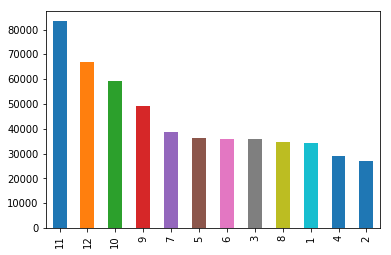

In [31]:
df.month.value_counts().plot(kind='bar')

**From the above graph we can conclude that most of sales happended in the last quarter of year**

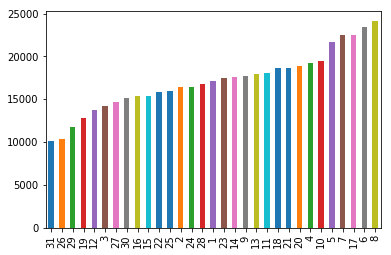

In [32]:
df.day.value_counts(ascending=True).plot(kind='bar')

**Top 10 items most sales**

In [33]:
df.Description.value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [34]:
df.groupby(['Description']).describe().transpose()

Description          4 PURPLE FLOCK DINNER CANDLES              ...               wrongly sold (22719) barcode
Quantity     count                       41.000000              ...                                        1.0
             mean                         3.512195              ...                                      170.0
             std                          3.834853              ...                                        NaN
             min                          1.000000              ...                                      170.0
             25%                          1.000000              ...                                      170.0
             50%                          2.000000              ...                                      170.0
             75%                          4.000000              ...                                      170.0
             max                         12.000000              ...                                      170.0
UnitPrice    count                       41.000000              ...                                        1.0
             mean                         2.455366              ...                                        0.0
             std                          0.825061              ...                                        NaN
             min                          0.790000              ...                                        0.0
             25%                          2.550000              ...                                        0.0
             50%                          2.550000              ...                                        0.0
             75%                          2.550000              ...                                        0.0
             max                          5.060000              ...                                        0.0
day          count                       41.000000              ...                                        1.0
             mean                        14.365854              ...                                       11.0
             std                          8.884695              ...                                        NaN
             min                          1.000000              ...                                       11.0
             25%                          7.000000              ...                                       11.0
             50%                         15.000000              ...                                       11.0
             75%                         20.000000              ...                                       11.0
             max                         30.000000              ...                                       11.0
hour         count                       41.000000              ...                                        1.0
             mean                        12.829268              ...                                       16.0
             std                          1.842586              ...                                        NaN
             min                          9.000000              ...                                       16.0
             25%                         12.000000              ...                                       16.0
             50%                         13.000000              ...                                       16.0
             75%                         14.000000              ...                                       16.0
             max                         16.000000              ...                                       16.0
month        count                       41.000000              ...                                        1.0
             mean                         8.902439              ...                                        3.0
             std                          3.382343              ...                                        NaN
    

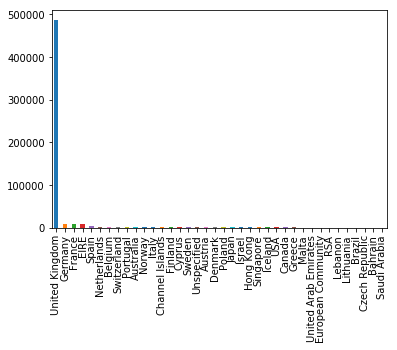

In [35]:
df.Country.value_counts().plot(kind='bar')

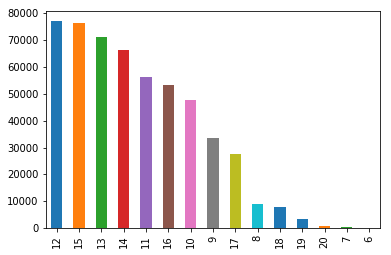

In [36]:
df['hour'].value_counts().plot(kind='bar')

In [37]:
df[df['month']==11].groupby(['Description']).sum().sort_values(by='total_amount',ascending=False)[:5]

,Quantity,UnitPrice,total_amount,month,day,year,hour
Description,,,,,,,
DOTCOM POSTAGE,47,36905.40,36905.40,517,830,94517,662
RABBIT NIGHT LIGHT,14954,1144.78,34556.72,5687,8089,1039687,6690
PAPER CHAIN KIT 50'S CHRISTMAS,7908,1309.74,28985.04,4466,6727,816466,5240
WHITE HANGING HEART T-LIGHT HOLDER,4944,884.06,14362.12,2959,4330,540959,3436
POPCORN HOLDER,12460,254.52,14195.60,2816,4306,514816,3281


### Conclusion

- **United Kindom has most number of sales and remaining countries sales are very far less than it**
- **WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPOT product are in top positions**
- **Most sales happended in November month**
- **First week of every month has good sales count**
- **Huge sales are happening around 12 PM everyday**
- **Most sales happedned in the end of year and maybe it's because of christmas**
- **In those months christmas gifts related products should have more stock**